In [37]:
import json
import typing as tp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from matplotlib.figure import Figure


class YouTube2:
    def __init__(self, trends_df_path: str = "RUvideos_short.csv", categories_df_path: str = "RU_category_id.json"):
        self.trends_df = pd.read_csv(trends_df_path)
        self.trends_df['trending_date'] = pd.to_datetime(self.trends_df['trending_date'], format="%y.%d.%m")

        with open(categories_df_path) as json_file:
            json_data = json.load(json_file)

        self.categories_df = pd.DataFrame(columns=['id', 'name'])

        for item in json_data['items']:
            self.categories_df = self.categories_df.append(
                {'id': int(item['id']),
                 'name': item['snippet']['title']},
                ignore_index=True
            )
        self.categories_df['id'] = self.categories_df['id'].astype(int)
        self.df = None
        self.piv_table = None

    def task1(self) -> pd.DataFrame:
        # Perform merge
        self.df = pd.merge(self.trends_df, self.categories_df, left_on='category_id', right_on='id')
        return self.df

    def task2(self) -> pd.DataFrame:
        table = pd.pivot_table(self.df, values='views', index='name',
                               columns=['trending_date'], aggfunc=np.sum)
        self.piv_table = table
        return table

    def task3(self) -> Figure:
        data_for_table = self.df.copy()
        data_for_table['trending_date'] = data_for_table['trending_date'].dt.day
        table = pd.pivot_table(data_for_table, values='views', index='name',
                               columns=['trending_date'], aggfunc=np.sum)
        sns.heatmap(table / 10 ** 6, annot=True, cmap="YlGnBu")

        # Add a title and axis labels to the plot
        plt.suptitle("Тепловая карта млн просмотров по дням и категориям")
        plt.xlabel('День')
        plt.ylabel('Категория')
        return plt.gcf()

    def task4(self) -> pd.DataFrame:
        table = pd.pivot_table(self.df, values='views', index='name',
                               columns=['trending_date'], aggfunc=np.sum, margins=True, margins_name='Всего просмотров')
        return table

    def task5(self) -> Figure:
        data_for_table = self.df.copy()
        data_for_table['trending_date'] = data_for_table['trending_date'].dt.day
        table = pd.pivot_table(data_for_table, values='views', index='name',
                               columns=['trending_date'], aggfunc=np.sum, margins=True, margins_name='Всего просмотров')
        table = table.apply(lambda x: x / x.max())
        table = table.drop(['Всего просмотров'])
        # table = pd.pivot_table(data_for_table, values='views', index='name',
        #                        columns=['trending_date'], aggfunc=np.sum)
        sns.heatmap(table, annot=True, fmt='.1g', cmap="YlGnBu")
        # sns.jointplot(data=table, y='name', kind='hist')

        # Add a title and axis labels to the plot
        plt.suptitle("Нормализованная тепловая карта просмотров по дням и категориям")
        plt.xlabel('День')
        plt.ylabel('Категория')
        return plt.gcf()


In [38]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

In [39]:
import warnings

with warnings.catch_warnings(record=True):
    yt_analysis = YouTube2(trends_df_path='../Data/task2_data/RUvideos_short.csv',
                           categories_df_path='../Data/task2_data/RU_category_id.json')
plt.show()

In [40]:
yt_analysis.task1()
yt_analysis.task2()
print('Done')

Done


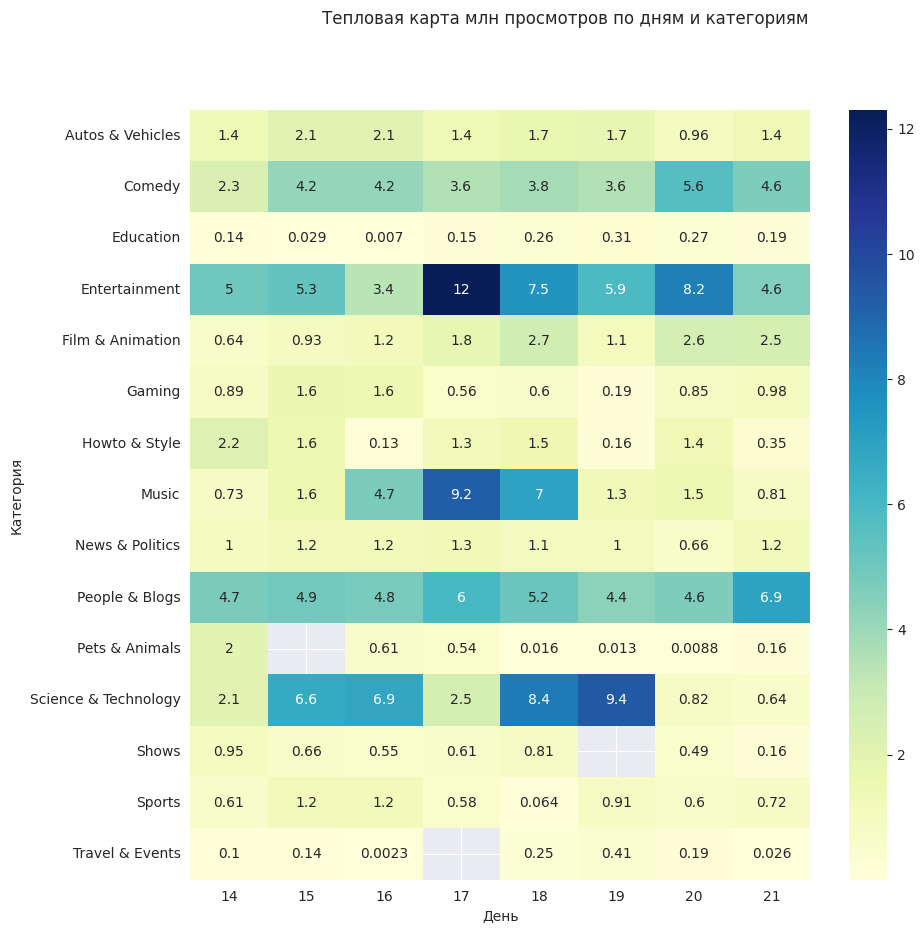

In [41]:
yt_analysis.task3();

In [42]:
yt_analysis.task4()

trending_date,2017-11-14 00:00:00,2017-11-15 00:00:00,2017-11-16 00:00:00,2017-11-17 00:00:00,2017-11-18 00:00:00,2017-11-19 00:00:00,2017-11-20 00:00:00,2017-11-21 00:00:00,Всего просмотров
name,,,,,,,,,
Autos & Vehicles,1350890.0,2076443.0,2051608.0,1386676.0,1713087.0,1736740.0,962761.0,1421017.0,12699222
Comedy,2310887.0,4152389.0,4156893.0,3556025.0,3806238.0,3556578.0,5648120.0,4627423.0,31814553
Education,139723.0,28850.0,6963.0,146943.0,256076.0,310830.0,270585.0,186909.0,1346879
Entertainment,5010384.0,5289490.0,3373346.0,12299938.0,7519942.0,5877590.0,8174020.0,4585563.0,52130273
Film & Animation,636616.0,931837.0,1160112.0,1820958.0,2725012.0,1075440.0,2574276.0,2532978.0,13457229
Gaming,885597.0,1609621.0,1583149.0,557074.0,600307.0,193316.0,851814.0,981217.0,7262095
Howto & Style,2191619.0,1562421.0,129763.0,1250164.0,1468139.0,156958.0,1402284.0,350009.0,8511357
Music,733907.0,1585619.0,4720464.0,9179397.0,6972429.0,1329904.0,1527219.0,809274.0,26858213
News & Politics,1010044.0,1225112.0,1174092.0,1251367.0,1056007.0,1028665.0,657263.0,1214178.0,8616728


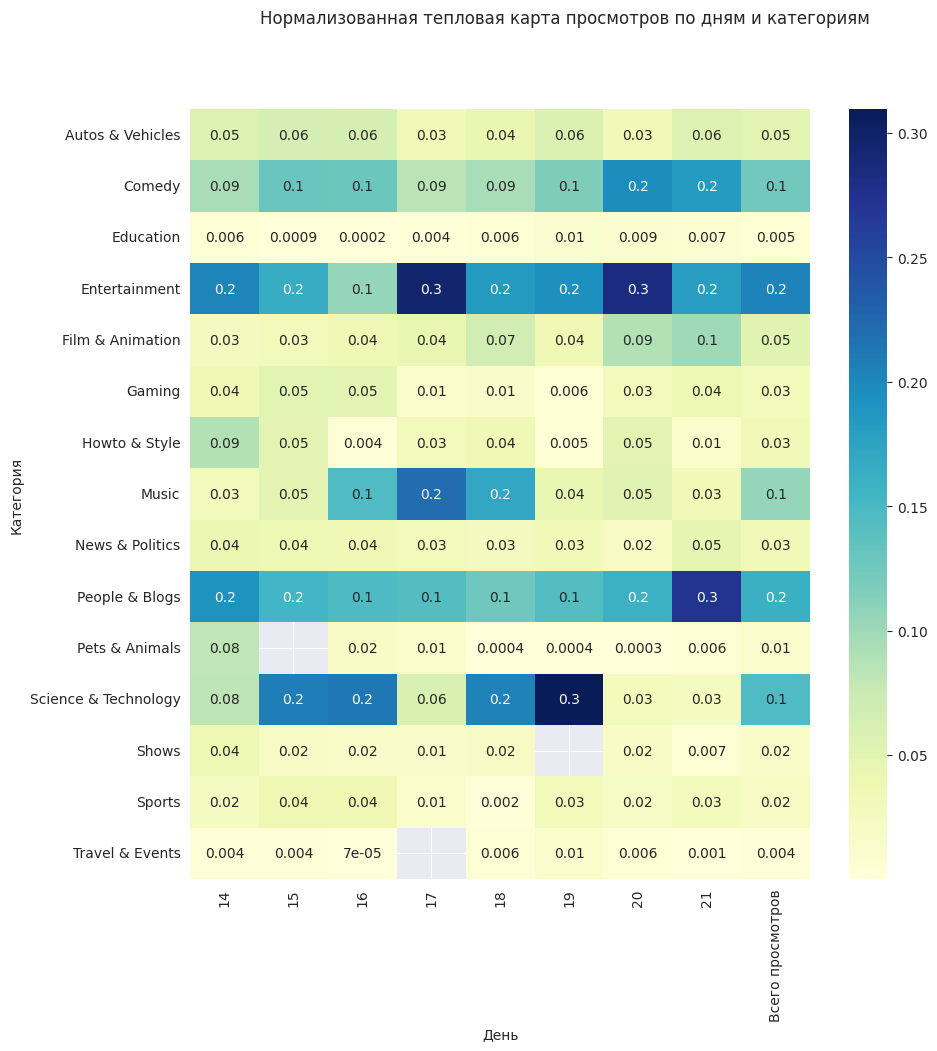

In [43]:
yt_analysis.task5();